In [1]:
import sys
main_dir = '../'
sys.path.append(main_dir)

import numpy as np
import cmasher as cmr
import matplotlib.cm as cm
import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
import matplotlib.gridspec as gridspec
from matplotlib.offsetbox import AnchoredText

import opennu as on

plt.style.use(main_dir+'sty.mplstyle')
cols = ['#0C5DA5', '#00B945', '#FF9500', '#FF2C00', '#845B97', '#474747', '#9e9e9e']

In [2]:
N = 1e8
pl = np.geomspace(1e-4, 1,40)
gl = np.geomspace(1e-3,10,10)

In [3]:
j0 = []

for pi in pl:
    t2, _, _, j1, _ = on.solve2nd(N, state='G', gp_ratio=0.99, gd_ratio=N*3e-4, p_init=pi)
    j0.append(j1[-1])

j0 = np.array(j0)/N*4

/home/g/work/OQS/pyOpenNu/notebooks/../opennu.py:114: RuntimeWarning: invalid value encountered in sqrt
  sz = np.sqrt(jz2-jz**2)


### Main plot

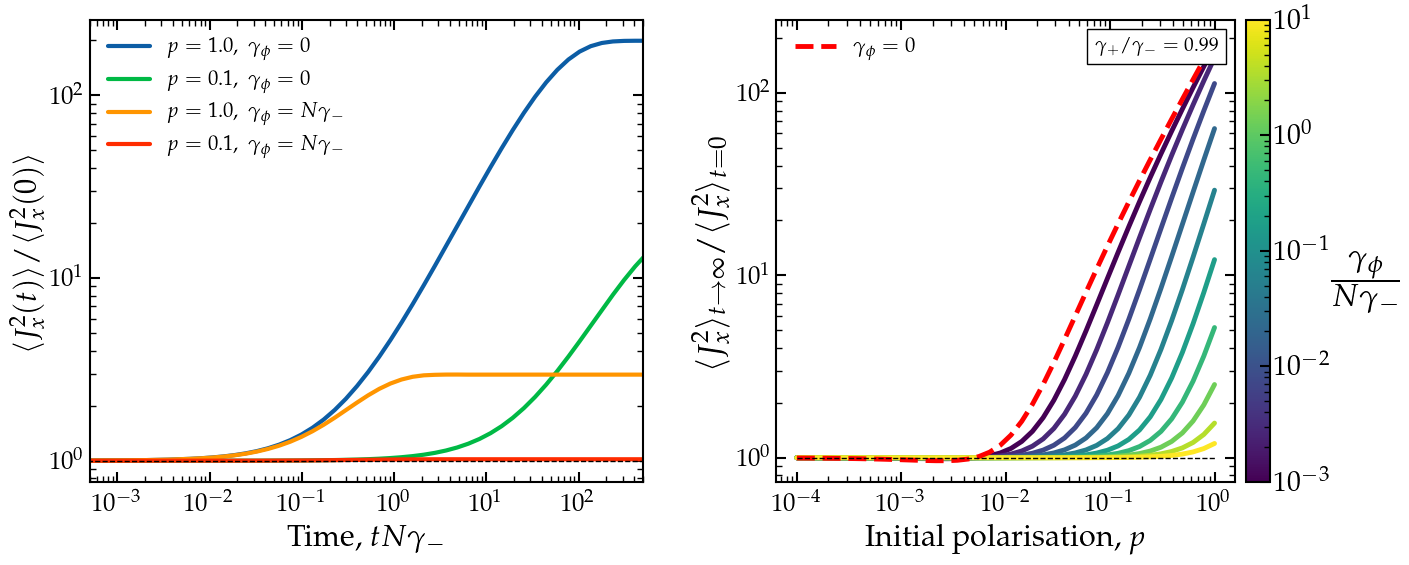

In [4]:
fig, ax = plt.subplots(1,2,figsize=(16,6))

############################################################################################################
# First plot?
############################################################################################################


pi = 1; de= 0
t2, _, _, j2, _ = on.solve2nd(N, state='G', gp_ratio=0.99, gd_ratio=N*de, p_init=pi, ti=1e-20,)
ax[0].loglog(t2*0.5, j2/N*4, label=r'$p=%.1f, ~\gamma_{\phi}=0$'%(pi))

pi = 0.1; de= 0
t2, _, _, j2, _ = on.solve2nd(N, state='G', gp_ratio=0.99, gd_ratio=N*de, p_init=pi, ti=1e-20,)
ax[0].loglog(t2*0.5, j2/N*4, label=r'$p=%.1f, ~\gamma_{\phi}=0$'%(pi))

pi = 1; de= 1
t2, _, _, j2, _ = on.solve2nd(N, state='G', gp_ratio=0.99, gd_ratio=N*de, p_init=pi, ti=1e-20,)
ax[0].loglog(t2*0.5, j2/N*4, label=r'$p=%.1f, ~\gamma_{\phi}=N\gamma_-$'%(pi))

pi = 0.1; de= 1
t2, _, _, j2, _ = on.solve2nd(N, state='G', gp_ratio=0.99, gd_ratio=N*de, p_init=pi, ti=1e-20,)
ax[0].loglog(t2*0.5, j2/N*4, label=r'$p=%.1f, ~\gamma_{\phi}=N\gamma_-$'%(pi))


ax[0].set_xlim(5e-4, 500)
ax[0].loglog(t2, t2/t2, c='k', ls='--', lw=1)
ax[0].set_xlabel(r'Time, $tN\gamma_-$', fontsize=22)
ax[0].set_ylabel(r'$\langle J_x^2(t)\rangle/\langle J_x^2(0)\rangle$', fontsize=22)
ax[0].legend()



############################################################################################################
# Second plot
############################################################################################################


cmap = cm.viridis
norm = mcolors.LogNorm(vmin=min(gl), vmax=max(gl)) 
sm = cm.ScalarMappable(norm=norm, cmap=cmap)


for de in gl:
    jx2i = []
    jx2f = []
    for pi in pl:
        t2, _, _, j2, _ = on.solve2nd(N, state='G', gp_ratio=0.99, gd_ratio=N*de, p_init=pi, ti=1e-20)
        jx2i.append(j2[0])
        jx2f.append(j2[-1])
    plt.loglog(pl, np.array(jx2f)/N*4, color=sm.to_rgba(de), lw=3.5)
plt.loglog(pl, j0, c='r', ls='--', lw=3.5, label=r'$\gamma_{\phi}=0$')

cbar = plt.colorbar(sm, ax=ax[1], pad=0.02)
cbar.set_label(r'$\frac{\gamma_\phi}{N\gamma_-}$', fontsize=30, rotation=0, labelpad=25)
cbar.ax.tick_params(labelsize=20)

gamma = 0.99
text_box = AnchoredText(
    fr"$\gamma_+/\gamma_- = {gamma:.2f}$", 
    loc='upper right',            
    frameon=True,                
    prop=dict(size=14)
)
ax[1].add_artist(text_box)

plt.loglog(pl, pl/pl, c='k', ls='--', lw=1)
plt.xlabel(r'Initial polarisation, $p$', fontsize=22)
plt.ylabel(r'$\langle J_x^2\rangle_{t\to\infty}/\langle J_x^2\rangle_{t=0}$', fontsize=24)
plt.legend()
plt.subplots_adjust(wspace=0.24)
plt.show()
#fig.savefig(main_dir+'plots/polarisation.pdf', bbox_inches='tight')

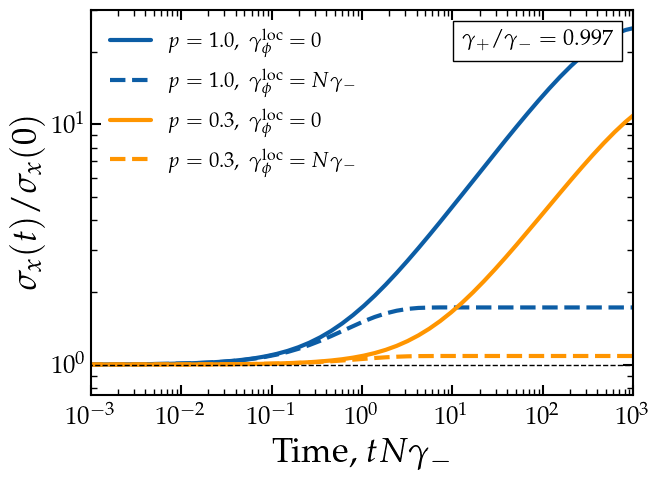

In [15]:
fig, ax = plt.subplots(figsize=(7,5))

############################################################################################################
# First plot?
############################################################################################################

gpr = 0.997

pi = 1; de= 0
t2, _, _, j2, _ = on.solve2nd(N, state='G', gp_ratio=gpr, gd_ratio=N*de, p_init=pi, ti=1e-20,)
ax.loglog(t2, np.sqrt(j2/N*4), c='C0', label=r'$p=%.1f, ~\gamma^{\rm loc}_{\phi}=0$'%(pi))

pi = 1; de= 1
t2, _, _, j2, _ = on.solve2nd(N, state='G', gp_ratio=gpr, gd_ratio=N*de, p_init=pi, ti=1e-20,)
ax.loglog(t2, np.sqrt(j2/N*4), c='C0', ls = '--', label=r'$p=%.1f, ~\gamma^{\rm loc}_{\phi}=N\gamma_-$'%(pi))

pi = 0.3; de= 0
t2, _, _, j2, _ = on.solve2nd(N, state='G', gp_ratio=gpr, gd_ratio=N*de, p_init=pi, ti=1e-20,)
ax.loglog(t2, np.sqrt(j2/N*4), c='C2', label=r'$p=%.1f, ~\gamma^{\rm loc}_{\phi}=0$'%(pi))

pi = 0.3; de= 1
t2, _, _, j2, _ = on.solve2nd(N, state='G', gp_ratio=gpr, gd_ratio=N*de, p_init=pi, ti=1e-20,)
ax.loglog(t2, np.sqrt(j2/N*4), c='C2', ls='--', label=r'$p=%.1f, ~\gamma^{\rm loc}_{\phi}=N\gamma_-$'%(pi))

gamma = 0.997
text_box = AnchoredText(
    fr"$\gamma_+/\gamma_- = {gamma:.3f}$", 
    loc='upper right',            
    frameon=True,                
    prop=dict(size=16)
)
ax.add_artist(text_box)

ax.set_xlim(1e-3, 1e3)
ax.set_ylim(0.75,30)
ax.loglog(t2, t2/t2, c='k', ls='--', lw=1)
# ax.set_yscale('linear')
ax.set_xlabel(r'Time, $tN\gamma_-$', fontsize=25)
#ax.set_ylabel(r'$\langle J_x^2(t)\rangle/\langle J_x^2(0)\rangle$', fontsize=22)
ax.set_ylabel(r'$\sigma_x(t)/\sigma_x(0)$', fontsize=25)
ax.legend()
plt.show()
fig.savefig(main_dir+'plots/sigmax_t.pdf', bbox_inches='tight')

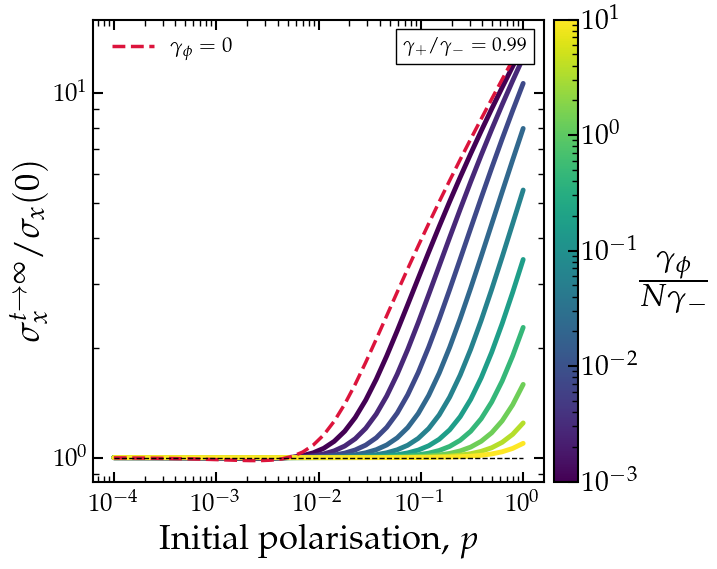

In [27]:
fig, ax = plt.subplots(figsize=(7,6))


cmap = cm.viridis
norm = mcolors.LogNorm(vmin=min(gl), vmax=max(gl)) 
sm = cm.ScalarMappable(norm=norm, cmap=cmap)


for de in gl:
    jx2i = []
    jx2f = []
    for pi in pl:
        t2, _, _, j2, _ = on.solve2nd(N, state='G', gp_ratio=0.99, gd_ratio=N*de, p_init=pi, ti=1e-20)
        jx2i.append(j2[0])
        jx2f.append(j2[-1])
    plt.loglog(pl, np.sqrt(np.array(jx2f)/N*4), color=sm.to_rgba(de), lw=3.5)


plt.loglog(pl, np.sqrt(j0), c='crimson', ls='--', lw=2.5, label=r'$\gamma_{\phi}=0$')

cbar = plt.colorbar(sm, ax=ax, pad=0.02)
cbar.set_label(r'$\frac{\gamma_\phi}{N\gamma_-}$', fontsize=30, rotation=0, labelpad=25)
cbar.ax.tick_params(labelsize=20)

gamma = 0.99
text_box = AnchoredText(
    fr"$\gamma_+/\gamma_- = {gamma:.2f}$", 
    loc='upper right',            
    frameon=True,                
    prop=dict(size=14)
)
ax.add_artist(text_box)

plt.loglog(pl, pl/pl, c='k', ls='--', lw=1)
plt.xlabel(r'Initial polarisation, $p$', fontsize=25)
#plt.ylabel(r'$\langle J_x^2\rangle_{t\to\infty}/\langle J_x^2\rangle_{t=0}$', fontsize=24)
plt.ylabel(r'$\sigma_x^{{t \to\infty}}/\sigma_x(0)$', fontsize=25)
plt.legend()
plt.subplots_adjust(wspace=0.24)
plt.show()
fig.savefig(main_dir+'plots/sigmax_p.pdf', bbox_inches='tight')

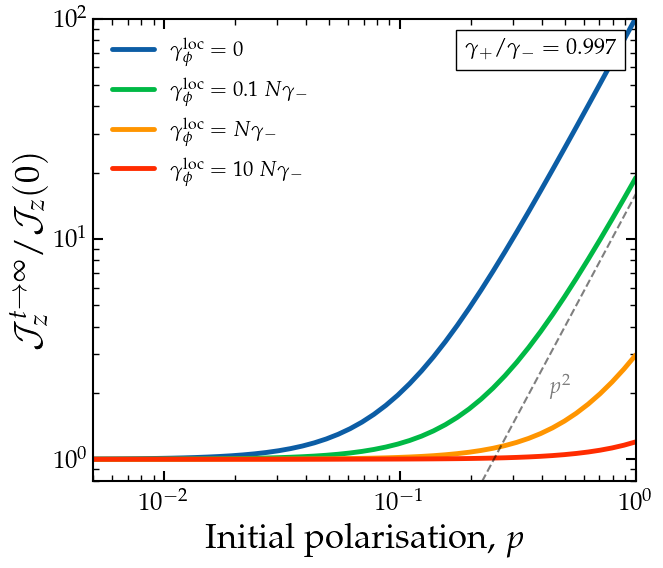

In [22]:
Ncode = 1e8

ti = 1e-5
tf = 1e2

fig, ax = plt.subplots(figsize=(7,6))

pols = np.geomspace(1e-5, 1, 100)
jj0 = []
jj1 = []
jj2 = []
jj3 = []
for p in pols:

    t, j0, _, _, _ = on.solve2nd(Ncode, state='P', p_init=p, gp_ratio=0.997, tf=tf, ti=ti, gd_ratio=0)
    t, j1, _, _, _ = on.solve2nd(Ncode, state='P', p_init=p, gp_ratio=0.997, tf=tf, ti=ti, gd_ratio=0.1*Ncode)
    t, j2, _, _, _ = on.solve2nd(Ncode, state='P', p_init=p, gp_ratio=0.997, tf=tf, ti=ti, gd_ratio=Ncode)
    t, j3, _, _, _ = on.solve2nd(Ncode, state='P', p_init=p, gp_ratio=0.997, tf=tf, ti=ti, gd_ratio=10*Ncode)
    jj0.append(np.abs(j0[-1]))
    jj1.append(np.abs(j1[-1]))
    jj2.append(np.abs(j2[-1]))
    jj3.append(np.abs(j3[-1]))

jj0 = np.array(jj0)
jj1 = np.array(jj1)
jj2 = np.array(jj2)
jj3 = np.array(jj3)

plt.loglog(pols, jj0/jj0[0], lw=3.5, label=r'$\gamma^{\rm loc}_{\phi}=0$')
plt.loglog(pols, jj1/jj1[0], lw=3.5, label=r'$\gamma^{\rm loc}_{\phi}=0.1~N\gamma_-$')
plt.loglog(pols, jj2/jj2[0], lw=3.5, label=r'$\gamma^{\rm loc}_{\phi}=N\gamma_-$')
plt.loglog(pols, jj3/jj3[0], lw=3.5, label=r'$\gamma^{\rm loc}_{\phi}=10~N\gamma_-$')

plt.loglog(pols*25, 1e4*pols**2, c='k', ls='--', lw=1.5, alpha=0.5)
plt.text(0.43, 2, r'$p^2$', fontsize=16, alpha=0.5, c='k')


gamma = 0.997
text_box = AnchoredText(
    fr"$\gamma_+/\gamma_- = {gamma:.3f}$", 
    loc='upper right',            
    frameon=True,                
    prop=dict(size=16)
)
ax.add_artist(text_box)


plt.xlabel(r'Initial polarisation, $p$', fontsize=25)
plt.ylabel(r'${\cal J}_z^{{t \to\infty}}/{\cal J}_z(0)$', fontsize=25)
plt.legend()
plt.xlim(5e-3, 1)
plt.ylim(0.8, 1e2)
plt.show()
fig.savefig(main_dir+'plots/jz_p.pdf', bbox_inches='tight')

#### Initial polarisation estimate

In [29]:
B = 10 # T
T = 4 # K
hbar = 1.055e-34 # J s 
gy = 7.4521e7 # rad s^-1 T^-1
kB = 1.381e-23 # J K^-1

E = gy*hbar*B
x = E/(kB*T)
p = np.tanh(x)
x,p

(0.0014232377805937727, np.float64(0.0014232368196216599))